#Project 1 - Aashni Manroa

In [2]:
# this block of code imports graphical libraries for plotting graphs with high resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [11]:
# Libraries of functions need to be imported
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial import Delaunay
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from scipy import linalg
from scipy.interpolate import interp1d, LinearNDInterpolator, NearestNDInterpolator
from sklearn.decomposition import PCA

# the following line(s) are necessary if you want to make SKlearn compliant functions
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

In [45]:
data = pd.read_csv('/content/drive/MyDrive/Senior Year :`)/DATA 441/cars.csv')

## Question 2


I will use the cars data, specifically the weights and cylinders x variables.

In [102]:
y = data['MPG'].values

In [60]:
import torch

In [108]:
class RidgeGD:
  def __init__(self, learning_rate=0.001, iterations=1000, lambda_val=0.1):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.lambda_val = lambda_val

  def fit(self, x, y):
    n_samples, n_features = x.shape
    self.bias = torch.zeros(1, requires_grad=True)
    self.weights = torch.zeros(n_features, requires_grad=True)

    for i in range(self.iterations):
        predictions = x.mm(self.weights.unsqueeze(1)) + self.bias
        # This is where the Ridge Regression occurs.
        loss = torch.mean((predictions - y.view(-1, 1)) ** 2) + self.lambda_val * torch.sum(self.weights ** 2)
        # Backpropagation occurs here.
        loss.backward()

        with torch.no_grad():
            self.weights -= self.learning_rate * self.weights.grad
            self.bias -= self.learning_rate * self.bias.grad
            self.weights.grad.zero_()
            self.bias.grad.zero_()

  def predict(self, x):
    predictions = x.mm(self.weights.unsqueeze(1)) + self.bias
    return predictions.detach().numpy()

In [109]:
model = RidgeGD(learning_rate=0.001, iterations=1000, lambda_val=0.01)
x = data.loc[:,'CYL':'WGT'].values
X_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
# Normalizing the x data
X_mean = torch.mean(X_tensor, dim=0)
X_std = torch.std(X_tensor, dim=0)
X_tensor = (X_tensor - X_mean) / X_std

model.fit(X_tensor, y_tensor)
predictions = model.predict(X_tensor)
print("Predictions:", predictions.reshape(-1))

Predictions: [13.683277  12.235074  13.675093  13.9643345 13.9545     8.637894
  8.097591   8.508271   7.8565187 10.946491  11.980101  12.696562
 11.023689  12.025888  25.367964  20.092484  20.256205  20.818491
 26.44139   27.359959  24.493805  25.307322  25.538559  25.637724
 20.648542   9.164227  10.968049  10.729444   9.9195175 26.44139
 25.164444  25.81635   20.03237   17.665716  17.50841   17.592484
 17.995949  10.628356   8.834692  10.779622  11.619988   7.6456995
  7.956603   6.729768  18.491228  24.716059  17.654758  18.10003
 25.661324  26.08332   26.975634  26.823723  28.07283   28.551044
 27.363071  27.10626   25.66066   26.443848  26.055279  24.716059
 25.642641  10.42596    9.080682  11.49855   10.857467  13.220139
  7.7286663  9.716015   9.859249   8.965471  27.428751  12.535104
 11.833683  11.323345  11.679151  23.461182  24.775204  23.33794
 26.277668  25.116411  25.94941   24.810764  26.315527  26.534803
 10.96776   13.220139  11.3165045 12.108021  12.613289   6.735366

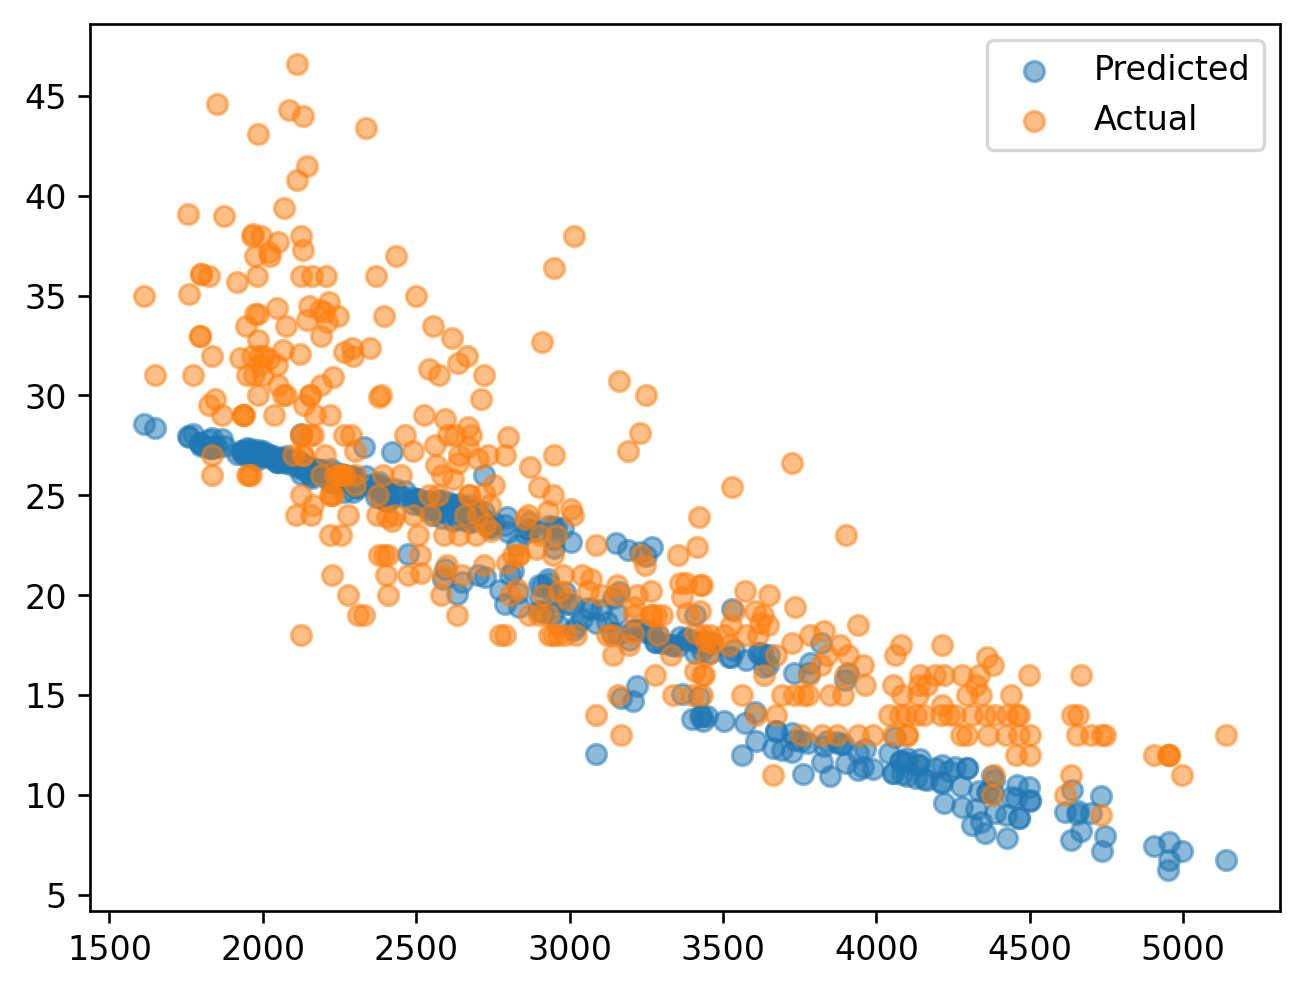

In [127]:
plt.scatter(data['WGT'].values,predictions.reshape(-1), alpha=0.5, label="Predicted")
plt.scatter(data['WGT'].values, y, alpha = 0.5, label="Actual")
plt.legend()

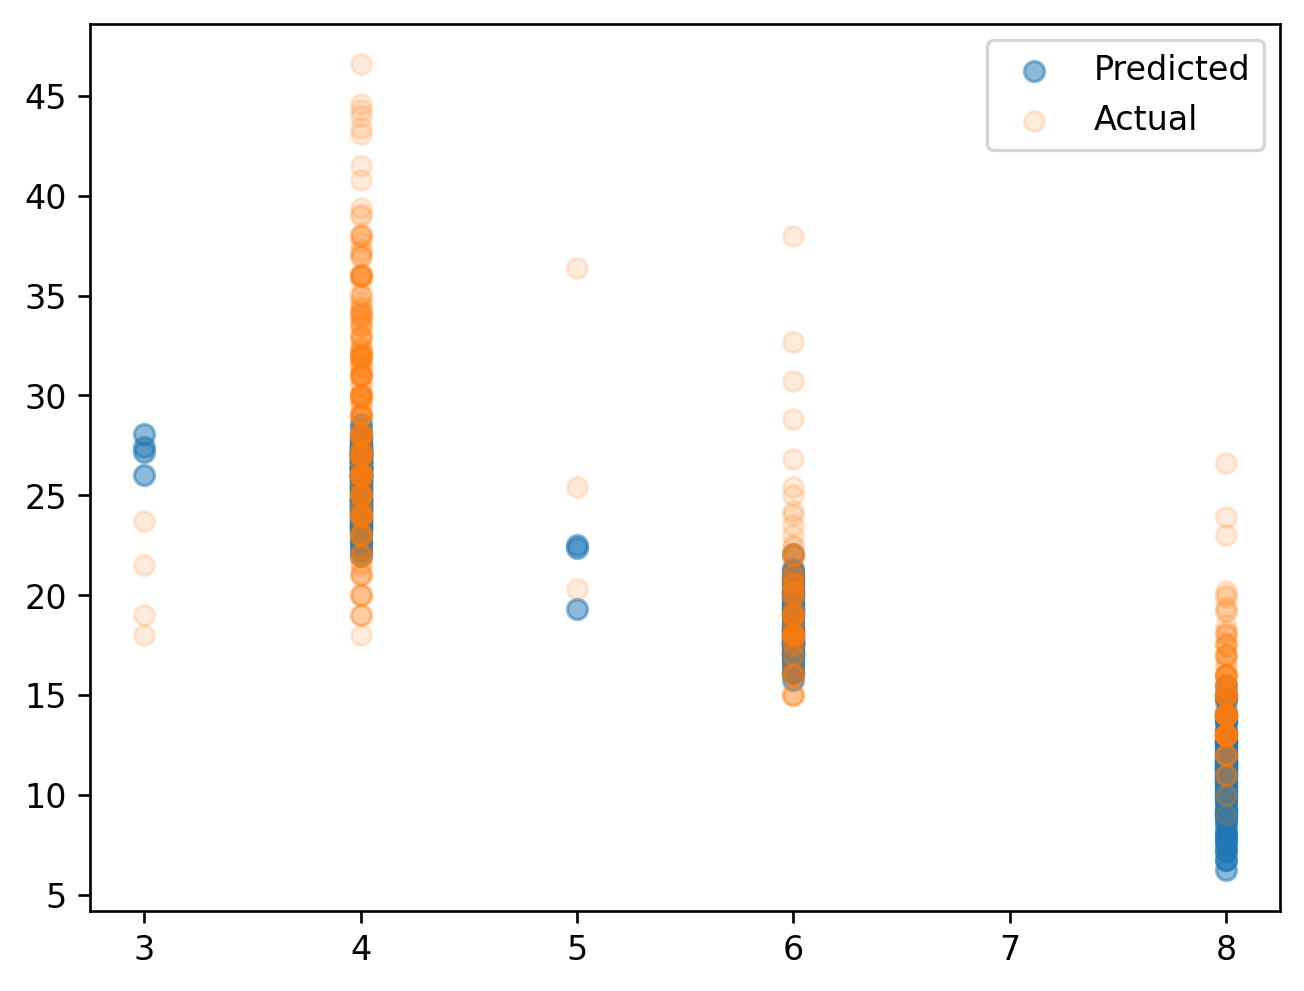

In [133]:
plt.scatter(data['CYL'].values,predictions.reshape(-1), alpha = 0.5, label = "Predicted")
plt.scatter(data['CYL'].values, y, alpha = 0.15, label = "Actual")
plt.legend()

Based on the graph, it looks like ridge regression did better at predicting the values of the cylinders than the weight of the car. It also looks like it did better at predicting the lower half (<30 mpg) of the weight graph. This might be because the weights graph is less linear, or that I didn't run enough iterations.

Additionally, the groups that formed in the weights graph could be because of the categorical data of the cylinders. I would like to run further tests to learn more.

## Question 3

I chose to use the cars.csv dataset when trying to fix the Lowess class. To figure out what this data looks like, I created two plots showing the cylinders and weight as compared to mpg.

In [12]:
# Gaussian Kernel
def Gaussian(x):
  return np.where(np.abs(x)>4,0,1/(np.sqrt(2*np.pi))*np.exp(-1/2*x**2))

In [13]:
# this is the correct vectorized version
def tricubic(x):
  return np.where(np.abs(x)>1,0,(1-np.abs(x)**3)**3)

In [14]:
# Epanechnikov Kernel
def Epanechnikov(x):
  return np.where(np.abs(x)>1,0,3/4*(1-np.abs(x)**2))

In [15]:
# Quartic Kernel
def Quartic(x):
  return np.where(np.abs(x)>1,0,15/16*(1-np.abs(x)**2)**2)

In [21]:
def dist(u,v):
  if len(v.shape)==1:
    v = v.reshape(1,-1)
  d = np.array([np.sqrt(np.sum((u-v[i])**2,axis=1)) for i in range(len(v))])
  return d

In [16]:
scale = StandardScaler()

In [18]:
x = data.loc[:,'CYL':'WGT'].values
y = data['MPG'].values

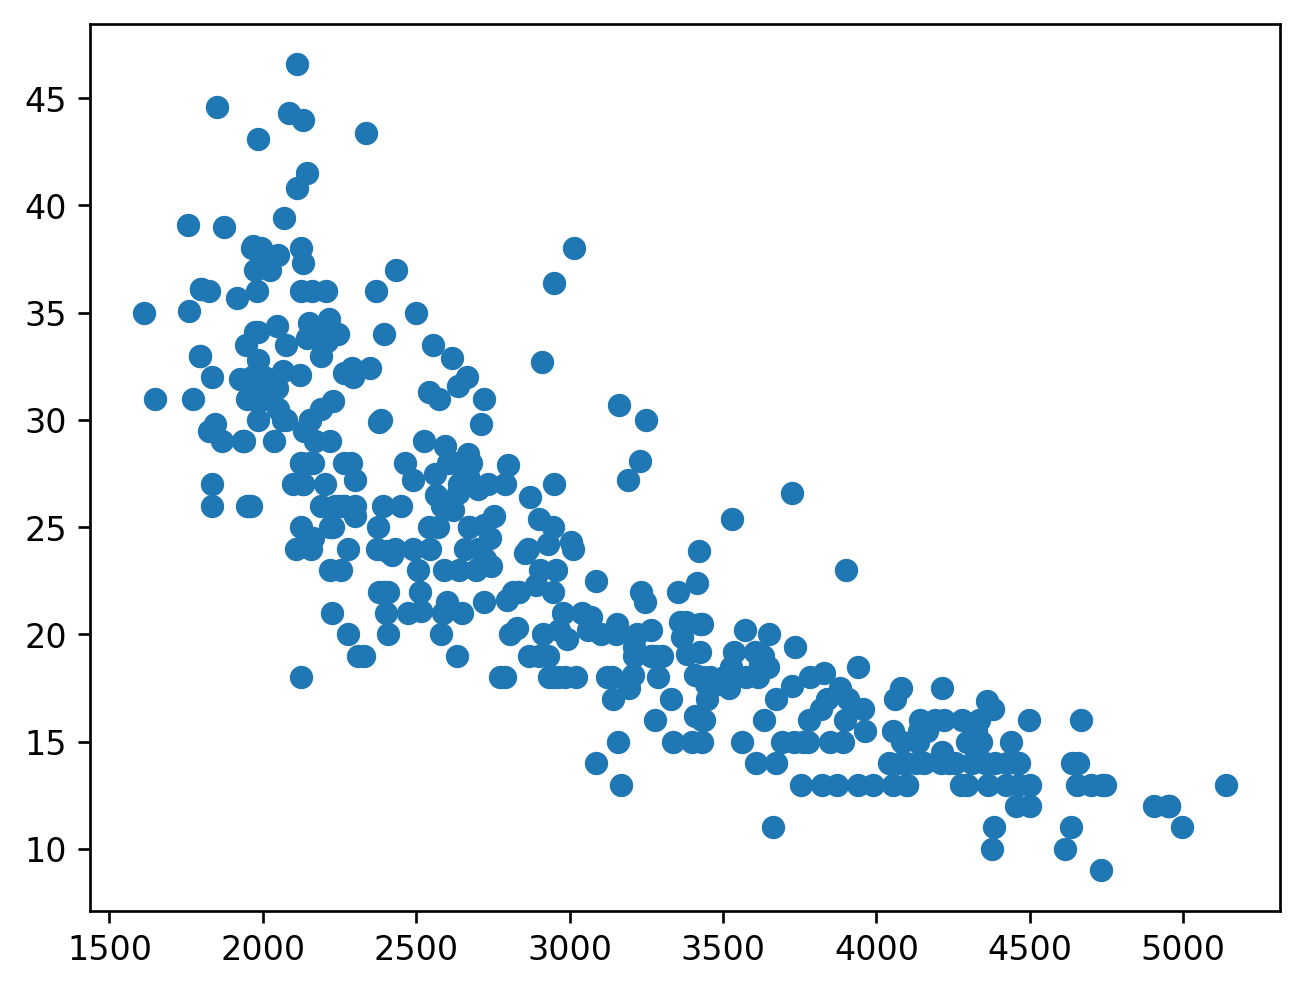

In [19]:
plt.scatter(data['WGT'].values,y)

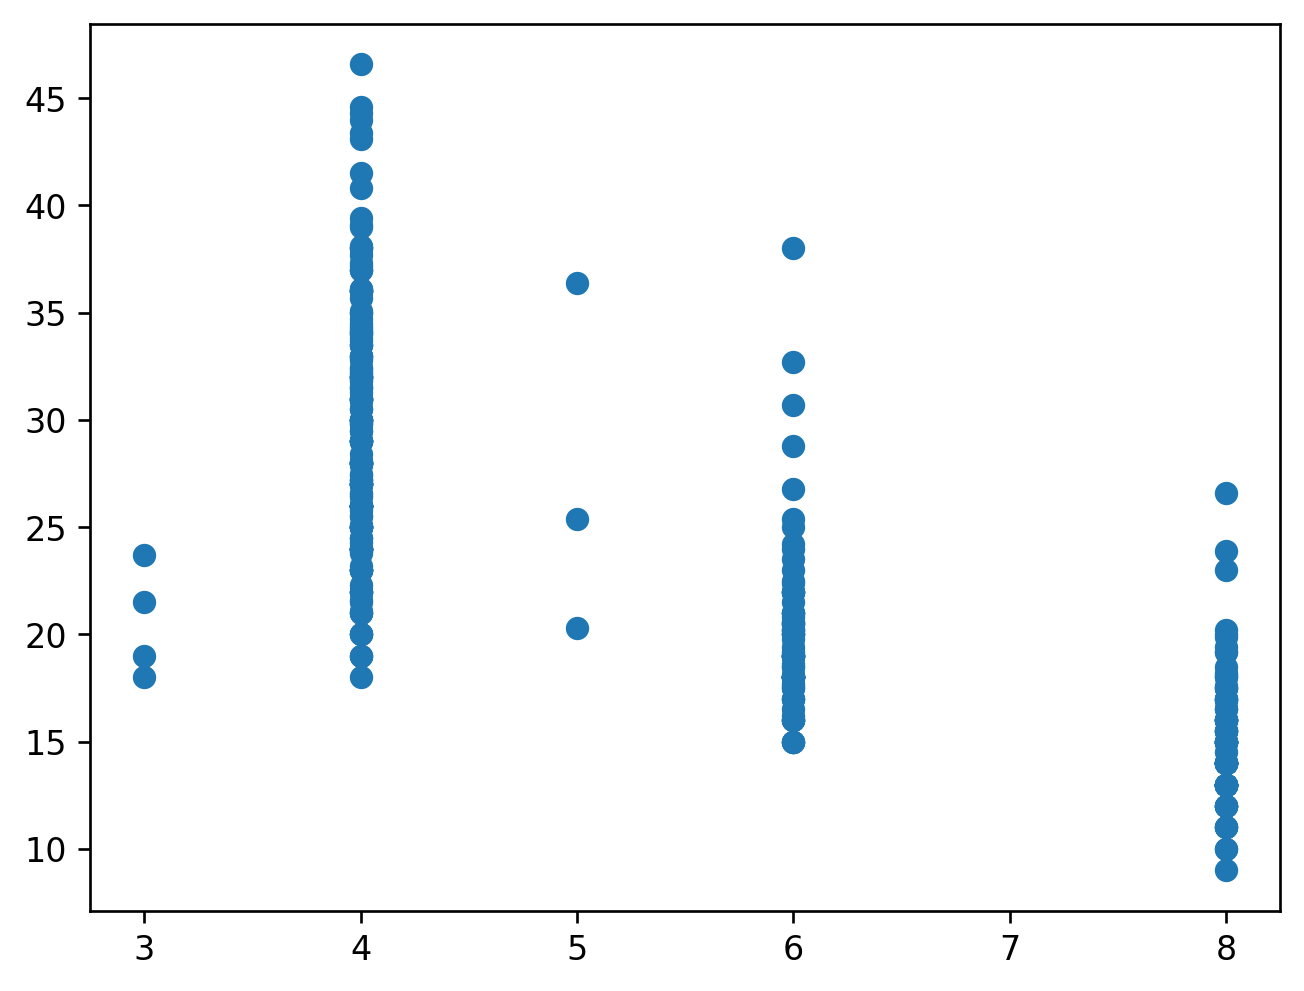

In [20]:
plt.scatter(data['CYL'].values,y)

We can see that the cylinders are a categorical variable. When running the original code, it gives me an error near this line:

In [ ]:
lm.fit(np.diag(w[:,i])@x,np.diag(w[:,i])@y)

I thought that it could be an error with the linear regression model or the weights, so I experimented with both. I found that changing w to:

In [ ]:
w = self.kernel(dist(x,x_new)/(2*self.tau))

helped me get rid of the error. I got this by just trying both of the potential values of w in the method called weight_matrix(). The MSE output from this was much smaller than the example earlier in our class notebook.

In [22]:
class Lowess:
  def __init__(self, kernel = Gaussian, tau=0.05):
    self.kernel = kernel
    self.tau = tau

  def fit(self, x, y):
    kernel = self.kernel
    tau = self.tau
    self.xtrain_ = x
    self.yhat_ = y

  def predict(self, x_new):
    check_is_fitted(self)
    x = self.xtrain_
    y = self.yhat_

    lm = linear_model.LinearRegression()

    w = self.kernel(dist(x,x_new)/(2*self.tau))

    if np.isscalar(x_new):
      lm.fit(np.diag(w)@(x.reshape(-1,1)),np.diag(w)@(y.reshape(-1,1)))
      yest = lm.predict([[x_new]])[0][0]
    else:
      n = len(x_new)
      yest_test = np.zeros(n)
      for i in range(n):
        lm.fit(np.diag(w[:,i])@x,np.diag(w[:,i])@y)
        yest_test[i] = lm.predict(x_new[i].reshape(1,-1))
    return yest_test

I also experimented with using different kernels and types of linear regression. For example, Ridge, Lasso, and ElasticNet. These gave me different kinds of MSEs. I also scaled the x data since we were testing two x variables against one y variable.

### Linear Regression

In [24]:
model = Lowess(kernel=Gaussian,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

3.9898904236731405

In [25]:
model = Lowess(kernel=Epanechnikov,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

1.7397199177969433

In [26]:
model = Lowess(kernel=tricubic,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

1.507884433378868

In [27]:
model = Lowess(kernel=Quartic,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

1.3943483809990682

### Ridge Regression

In [30]:
class Lowess:
  def __init__(self, kernel = Gaussian, tau=0.05):
    self.kernel = kernel
    self.tau = tau

  def fit(self, x, y):
    kernel = self.kernel
    tau = self.tau
    self.xtrain_ = x
    self.yhat_ = y

  def predict(self, x_new):
    check_is_fitted(self)
    x = self.xtrain_
    y = self.yhat_

    lm = linear_model.Ridge(0.0001) # the closer the alpha is to 0, the smaller the MSE value.

    w = self.kernel(dist(x,x_new)/(2*self.tau))

    if np.isscalar(x_new):
      lm.fit(np.diag(w)@(x.reshape(-1,1)),np.diag(w)@(y.reshape(-1,1)))
      yest = lm.predict([[x_new]])[0][0]
    else:
      n = len(x_new)
      yest_test = np.zeros(n)
      for i in range(n):
        lm.fit(np.diag(w[:,i])@x,np.diag(w[:,i])@y)
        yest_test[i] = lm.predict(x_new[i].reshape(1,-1))
    return yest_test

In [31]:
model = Lowess(kernel=Gaussian,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

4.724046555940852

In [32]:
model = Lowess(kernel=Epanechnikov,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

2.65704532460209

In [33]:
model = Lowess(kernel=tricubic,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

2.1333860762724264

In [34]:
model = Lowess(kernel=Quartic,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

1.9742300413784686

### Lasso Regression

In [35]:
class Lowess:
  def __init__(self, kernel = Gaussian, tau=0.05):
    self.kernel = kernel
    self.tau = tau

  def fit(self, x, y):
    kernel = self.kernel
    tau = self.tau
    self.xtrain_ = x
    self.yhat_ = y

  def predict(self, x_new):
    check_is_fitted(self)
    x = self.xtrain_
    y = self.yhat_

    lm = linear_model.Lasso(0.0001) # the closer the alpha is to 0, the smaller the MSE value.

    w = self.kernel(dist(x,x_new)/(2*self.tau))

    if np.isscalar(x_new):
      lm.fit(np.diag(w)@(x.reshape(-1,1)),np.diag(w)@(y.reshape(-1,1)))
      yest = lm.predict([[x_new]])[0][0]
    else:
      n = len(x_new)
      yest_test = np.zeros(n)
      for i in range(n):
        lm.fit(np.diag(w[:,i])@x,np.diag(w[:,i])@y)
        yest_test[i] = lm.predict(x_new[i].reshape(1,-1))
    return yest_test

In [36]:
model = Lowess(kernel=Gaussian,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.420e-01, tolerance: 1.777e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.090e-01, tolerance: 4.672e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.595e-02, tolerance: 2.258e

5.3020733152712145

In [37]:
model = Lowess(kernel=Epanechnikov,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.852e-02, tolerance: 1.262e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.096e-02, tolerance: 1.262e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.206e-02, tolerance: 1.262e

3.28392795666112

In [38]:
model = Lowess(kernel=tricubic,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.378e-02, tolerance: 2.244e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.534e-02, tolerance: 1.955e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.112e-02, tolerance: 1.955e

2.811595763832719

In [39]:
model = Lowess(kernel=Quartic,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.269e-02, tolerance: 1.972e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.969e-02, tolerance: 1.718e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.801e-02, tolerance: 1.718e

2.439451316964001

### ElasticNet Regression

In [40]:
class Lowess:
  def __init__(self, kernel = Gaussian, tau=0.05):
    self.kernel = kernel
    self.tau = tau

  def fit(self, x, y):
    kernel = self.kernel
    tau = self.tau
    self.xtrain_ = x
    self.yhat_ = y

  def predict(self, x_new):
    check_is_fitted(self)
    x = self.xtrain_
    y = self.yhat_

    lm = linear_model.ElasticNet(0.0001) # the closer to 0, the smaller the MSE value.

    w = self.kernel(dist(x,x_new)/(2*self.tau))

    if np.isscalar(x_new):
      lm.fit(np.diag(w)@(x.reshape(-1,1)),np.diag(w)@(y.reshape(-1,1)))
      yest = lm.predict([[x_new]])[0][0]
    else:
      n = len(x_new)
      yest_test = np.zeros(n)
      for i in range(n):
        lm.fit(np.diag(w[:,i])@x,np.diag(w[:,i])@y)
        yest_test[i] = lm.predict(x_new[i].reshape(1,-1))
    return yest_test

In [41]:
model = Lowess(kernel=Gaussian,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

12.257672660541044

In [42]:
model = Lowess(kernel=Epanechnikov,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

4.593960253370645

In [43]:
model = Lowess(kernel=tricubic,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.624e+00, tolerance: 8.021e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.624e+00, tolerance: 8.021e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.448e+00, tolerance: 7.697e

3.3605932812514365

In [44]:
model = Lowess(kernel=Quartic,tau=0.02)
xscaled = scale.fit_transform(x)
model.fit(xscaled,y)
yhat = model.predict(xscaled)
mse(yhat,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+00, tolerance: 6.190e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+00, tolerance: 6.190e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.540e-01, tolerance: 6.029e

3.1071470976099644

### Conclusion

I found that for each type of regression, the Quartic Kernel always performed the best. And out of each of the types of regression, Linear Regression with the Quartic Kernel performed the best, with an MSE of 1.3943483809990682.